# Knickpoint Analyses for Geoscience
-Nick Lewis, Joanmarie Del Vecchio, Chuck Bailey.

Steps
- Get Dem (take user bounds, res.)
- Download geology shp files
- Download WBD GDB
- User can now select what they want to do.
Export files include:
	- Folders for each watershed w name
        - Relief map
            - W/ LSHT highlighted
	    - Slope map (similar but not the same!)
            - LSHT
	    - Knickpoints mapped (maybe adjust delta ksn?  To isolate bedrock reaches.)
		- Profile w trimodal morphology represented (maybe, refer to chuck suggestion)
	- CSVs of knickpoints
		- To be included:
        - Wshed
		- elevation
		- Coords
		- Shapefile geology
		- Nearest roadcut geology that is also within some threshold of elevation from knickpoint.  Do buffer around knickpoint select closest to elevation.
		- Stream cover type (to allow narrowing to bedrock)
		- If BR, fracture data, if AP, bedding
		- If not in AP or BR, Send back a message being like sorry dawg.
		- Depth to mantle @ knickpoint.  Z score to average depth in region.
		- Slope

# Code begins here!

#### Below is a 'code cell'.  This is a block of text that Jupyter and Python use to perform tasks.

#### To run the following code cell and all code cells below, select the cell and press
# <p style="color: aqua;">Shift+Enter.</p>

In [1]:
# This is called a comment.  Denoted by the '#' behind the text, it allows me to better explain code cells while still being a begign line of text.

# First, we import the YML file.  This saves you the work of making your own python environment and installing a bunch of packages.
#!conda env create -f env.yml

In [2]:
# From google drive, let's get the peripheral files our code will use.
#function here that imports shit

In [8]:
# Import packages to our notebook.
# We must do this to use the functions contained inside the packages.
# Some functions have 'as' in the import call.  This is for less typing, and nothing else.
# Google any package name and 'docs' in order to find more detailed explanation of any one package.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import xdem
import os
import rasterio as rio
from rasterio.plot import show
import glob
from concurrent.futures import ThreadPoolExecutor
import requests
import shapely

#### Phew!  That was a lot of initial stuff, but no worries.  We can start *really* coding now.

#### Below is a code cell containing our **Constant** Variables, which you may change as you see fit for your particular analyses.

#### Below are 
- Integers
- Lists (denoted by square brackets at the beginning and end, separated by commas [a, b, c, d])
- Strings (contained within quotes 'Like this!')

In [9]:
# Every time you change something within the code cell, run it once more to update the variable.

BOUNDS = [39.0, -80.0, 37.5, -81.5] # In decimal coordinate form.  Format: [N, E, S, W].  Select the smallest area possible in your analyses for maximum resoultion!  
# For now, keep them in Virginia or West VA.

API_KEY = '9086887f175d33aa72eda767f5b1e9cd' # Get your API key from opentopography.org.  Students get higher resolution data!

DEM_DATASET = 'USGS30m' # Options are USGS30m, USGS10m, & USGS1m.  Be warned!  As resolution goes up, available area goes down.

PROJ_TITLE = 'n_lewis' # Create a succinct name with no spaces or leading digits to represent your project file for future exports.

#### If you can't remember what a function does, call the help() function and pass the name of the function you are wondering about inside the colons.

In [10]:
# Downloader
def downloader(bounds:list = BOUNDS, api_key:str = API_KEY, dem_dataset:str = DEM_DATASET, proj_title:str = PROJ_TITLE): # To call a function, we have to define it first.
    """
    This function takes in the user-defined constants and creates a directory.  It then places a geotiff in the directory.

    args: Bounds (list), api_key (str), dem_dataset (str), proj_title (str).

    returns: None.
    """

    # First, we make our directory for project files.
    path = os.getcwd() # Gets your current working directory.
    try:
        os.mkdir(path = f'{path}/{proj_title}')
        print(f'Directory "{path}/{proj_title}" created successfully.') # Tries to make the directory for project files.
        proj_dir = f'{path}/{proj_title}'
    except FileExistsError:
        print(f'Directory "{path}/{proj_title}" already exists.') # If it doesnt work, it'll tell you!
        proj_dir = f'{path}/{proj_title}'
    except Exception as e:
        print(f'An error occurred: {e}')

    # Now to download our dem.
    dic = dict(zip(['north', 'east', 'south', 'west'], bounds)) # Makes a dictionary to let us more easily acess our bounds.
    url = f'https://portal.opentopography.org/API/usgsdem?datasetName={dem_dataset}&south={dic["south"]}&north={dic["north"]}&west={dic["west"]}\
&east={dic["east"]}&outputFormat=GTiff&API_Key={api_key}' # Creates our URL so we can download.
    print('Querying API...')
    response = requests.get(url) # Saves what the URL spit back at us
    print('URL passed, now waiting for file to write.')
    with open(f'{proj_dir}/gtiff.tiff', 'wb') as file:
        file.write(response.content) # Writes the response to our project file
    print('File Written.')

downloader() # Here, we call the function.

Directory "/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/jupyter_proto/n_lewis" already exists.
Querying API...
URL passed, now waiting for file to write.
File Written.


#### Next we will clip out each watershed in your selected area.

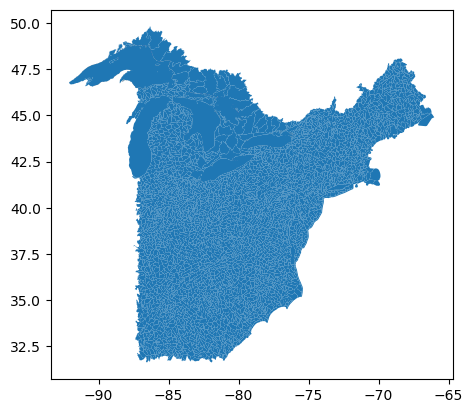

In [12]:
def wshed_clipper(proj_title=PROJ_TITLE):
    # PLACEHOLDER - Line to download wsheds csv
    # df = pd.read_csv(f'{os.getcwd}/{proj_title}/wsheds.csv')
    df = pd.read_csv('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/wbd_scale/WBDHU10.csv')
    gdf = gpd.GeoDataFrame(data=df, crs=rio.CRS.from_epsg(4269), geometry=[shapely.wkt.loads(x) for x in df['geometry']])
    gdf.plot()

wshed_clipper()

In [ ]:
# Watershed divider
df = pd.read_csv('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/wbd_scale/WBDHU10.csv')
gdf = gpd.GeoDataFrame(data=df, crs=rio.CRS.from_epsg(4269), geometry=[shapely.wkt.loads(x) for x in df['geometry']])

       Unnamed: 0                                   tnmid  \
11             11  {DAD729F5-59A0-47CF-8B66-2C36B40BF081}   
16             16  {02DAE5A1-A054-47DA-8E8A-48FD2A4E9D89}   
17             17  {55510B78-D60A-4979-A297-2A45C6C2965A}   
30             30  {A45B1F2D-A944-43EB-9A2D-AB87E0EACB43}   
36             36  {396C3CBE-56E7-4C07-B45A-AD01036F538C}   
...           ...                                     ...   
18361       18361  {77E99835-57FB-43C3-88C2-79974D9C8D10}   
18372       18372  {78A6E19B-E15C-4670-80CC-0C13D4787820}   
18373       18373  {14DC8E69-7012-46E9-9082-D114960D5BA0}   
18391       18391  {9B76B129-4FE9-4BE6-B1EA-D6BF1B151116}   
18528       18528  {2CCE4CB1-B823-45DF-8A59-35066103ED97}   

                                 metasourceid  \
11     {511D2AC8-11BA-45FC-AB98-F69D693D4C44}   
16     {511D2AC8-11BA-45FC-AB98-F69D693D4C44}   
17     {511D2AC8-11BA-45FC-AB98-F69D693D4C44}   
30     {511D2AC8-11BA-45FC-AB98-F69D693D4C44}   
36     {511D2AC8-11BA-

<Axes: >

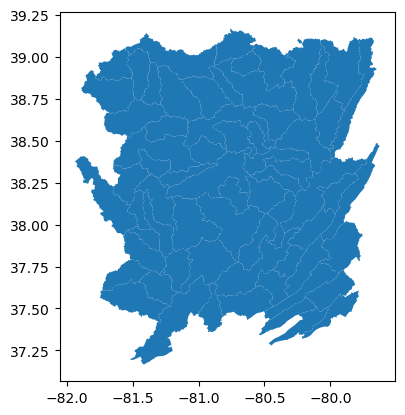

In [15]:
clipped = gdf.cx[BOUNDS[3]:BOUNDS[1], BOUNDS[2]:BOUNDS[0]]
clipped.plot()

In [1]:
# Relief & LSHT toolbox


In [ ]:
# KSN toolbox

In [ ]:
# Mapper

In [ ]:
# DF Maker

In [ ]:
# Exporter

In [ ]:
# Kept to show how wshed dataset was narrowed.  U10 scale and only regions in the appalachians.
#apps = gdf.cx[-87:-58, 32:49]
#apps.to_csv('/sciclone/home/ntlewis/Nick-Lewis-Research/working_files/data/wbd_scale/WBDHU10.csv')